In [2]:
# Import all necessary libraries.
import numpy as np
import pandas as pd
from sklearn  import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Read dataset

In [35]:
# Import Dataset

traffic_data = pd.read_csv("dataset/Metro_Interstate_Traffic_Volume.csv")
traffic_data = traffic_data.set_index(pd.DatetimeIndex(traffic_data['date_time'])).rename(columns={"date_time": "ds"})
traffic_data['ds'] = pd.to_datetime(traffic_data['ds'],infer_datetime_format=True)
traffic_data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,ds,traffic_volume
date_time,,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
2018-09-30 20:00:00,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
2018-09-30 21:00:00,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159


In [36]:
traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,ds,traffic_volume
date_time,,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [37]:
# Checking for any missing or empty value
traffic_data.isna().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
ds                     0
traffic_volume         0
dtype: int64

# convert categorical to nominal data

In [38]:
# Convert categorical value to numerical values. For holiday attribute, value will be within by 0 and 1. If it is holiday then 1 otherwise 0
label_encoder = preprocessing.LabelEncoder()
traffic_data['holiday'] = np.where(traffic_data.holiday=='None',0,1).astype('int64')
traffic_data['weather_main'] = label_encoder.fit_transform(traffic_data['weather_main'])
traffic_data['weather_description'] = label_encoder.fit_transform(traffic_data['weather_description'])

In [39]:
traffic_data.describe()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,0.001265,281.205870,0.334264,0.000222,49.362231,2.578375,16.540536,3259.818355
std,0.035551,13.338232,44.789133,0.008168,39.015750,2.784224,8.970108,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,272.160000,0.000000,0.000000,1.000000,0.000000,10.000000,1193.000000
50%,0.000000,282.450000,0.000000,0.000000,64.000000,1.000000,17.000000,3380.000000
75%,0.000000,291.806000,0.000000,0.000000,90.000000,5.000000,27.000000,4933.000000
max,1.000000,310.070000,9831.300000,0.510000,100.000000,10.000000,37.000000,7280.000000


<AxesSubplot:xlabel='date_time'>

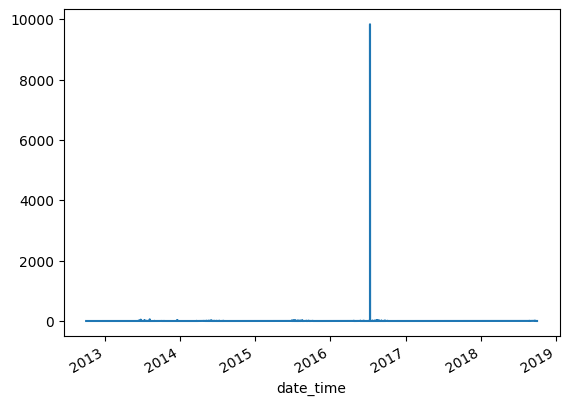

In [40]:
#traffic_data['temp'].plot()
traffic_data['rain_1h'].plot()

<AxesSubplot:xlabel='date_time'>

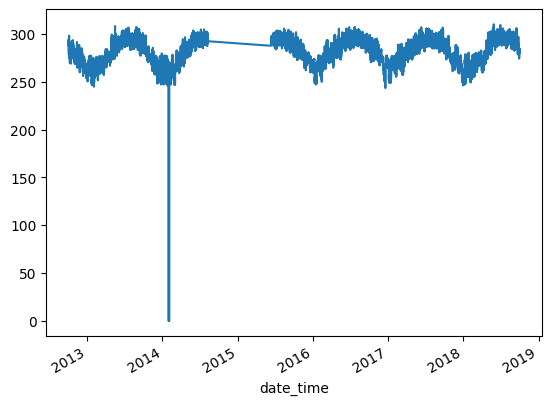

In [41]:
traffic_data['temp'].plot()

In [42]:
Q1 = traffic_data.quantile(0.25)
Q3 = traffic_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

holiday                   0.000
temp                     19.646
rain_1h                   0.000
snow_1h                   0.000
clouds_all               89.000
weather_main              5.000
weather_description      17.000
traffic_volume         3740.000
dtype: float64


In [43]:
traffic_data=traffic_data[~((traffic_data['temp'] <(Q1['temp']-1.5*IQR['temp'])) | (traffic_data['temp'] >(Q1['temp']+1.5*IQR['temp'])))]
#traffic_data=traffic_data[~((traffic_data['rain_1h'] <(Q1['rain_1h']-1.5*IQR['rain_1h'])) | (traffic_data['rain_1h'] >(Q1['rain_1h']+1.5*IQR['rain_1h'])))]

# Prepare training and testing data

<AxesSubplot:xlabel='date_time'>

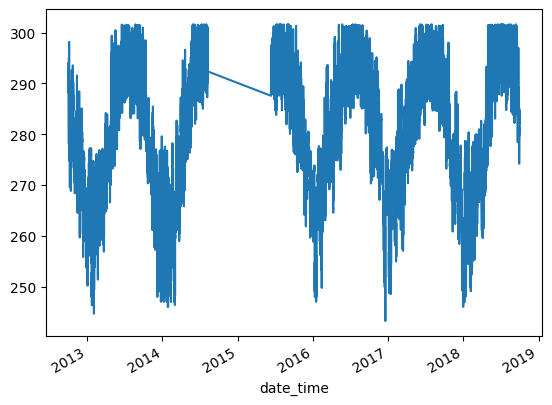

In [44]:
# ploting traffic data to see to see any data imbalance
traffic_data['temp'].plot()

<AxesSubplot:xlabel='date_time'>

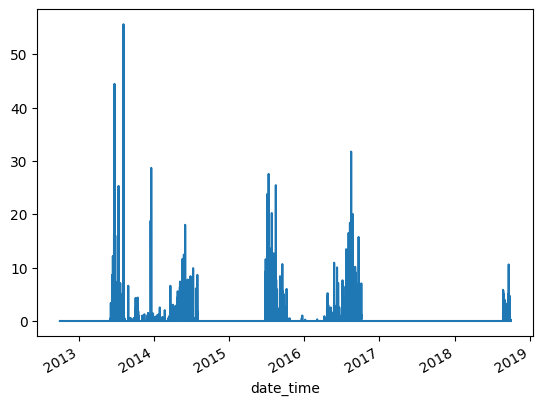

In [45]:
traffic_data['rain_1h'].plot()

In [46]:

traffic_data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,ds,traffic_volume
date_time,,,,,,,,,
2012-10-02 09:00:00,0,288.28,0.0,0.0,40,1,24,2012-10-02 09:00:00,5545
2012-10-02 10:00:00,0,289.36,0.0,0.0,75,1,2,2012-10-02 10:00:00,4516
2012-10-02 11:00:00,0,289.58,0.0,0.0,90,1,19,2012-10-02 11:00:00,4767
2012-10-02 12:00:00,0,290.13,0.0,0.0,90,1,19,2012-10-02 12:00:00,5026
2012-10-02 13:00:00,0,291.14,0.0,0.0,75,1,2,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,0,283.45,0.0,0.0,75,1,2,2018-09-30 19:00:00,3543
2018-09-30 20:00:00,0,282.76,0.0,0.0,90,1,19,2018-09-30 20:00:00,2781
2018-09-30 21:00:00,0,282.73,0.0,0.0,90,10,21,2018-09-30 21:00:00,2159


In [47]:
split_date = '2018-08-20'
train_data = traffic_data.loc[traffic_data.index <= split_date].copy()
test_data = traffic_data.loc[traffic_data.index > split_date].copy()

In [48]:
def plot_series(time, series, format='-', start=0, end=None):
    plt.plot(time[start:end], series[start:end],format)
    plt.xlabel('Time')
    plt.ylabel('Traffic Volume')
    plt.grid(True)

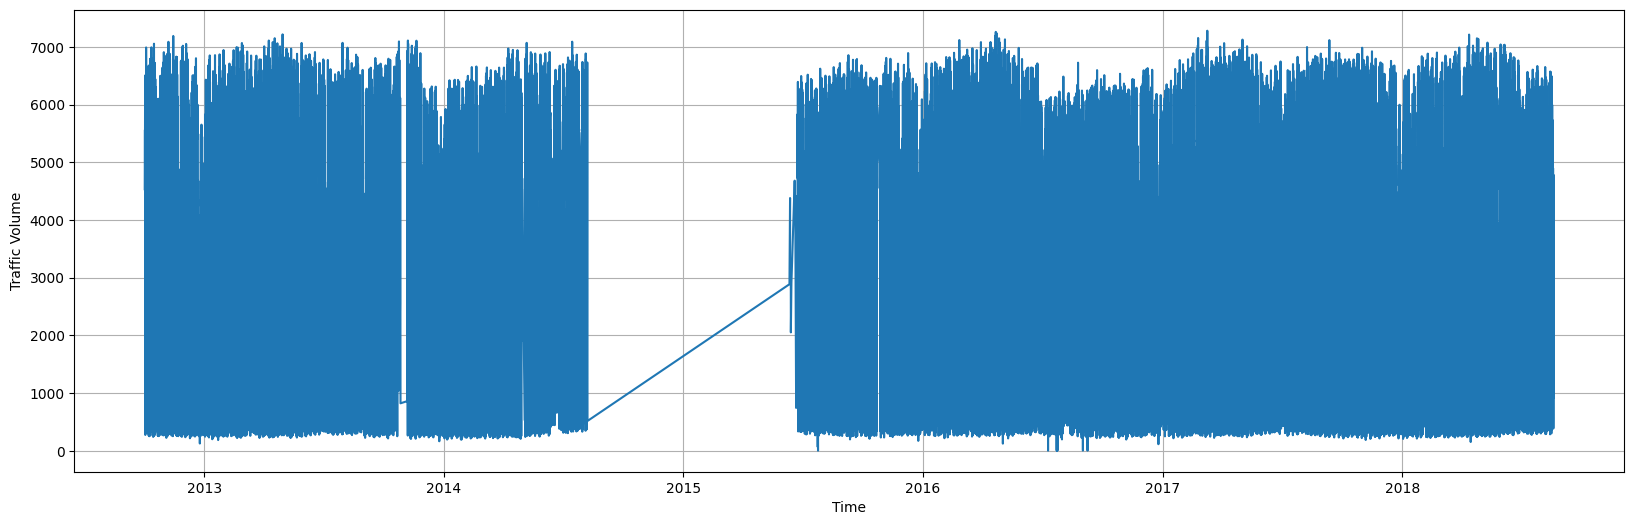

In [49]:
x_train = np.array(train_data['traffic_volume'])
x_valid = np.array(test_data['traffic_volume'])

time_train = np.array(train_data['ds'])
time_valid = np.array(test_data['ds'])

plt.figure(figsize=(20,6))
plot_series(time_train, x_train)

In [51]:
train_data_without_ds = train_data.drop(columns=['ds'])
train_data_without_ds
test_data_without_ds = test_data.drop(columns=['ds'])
test_data_without_ds

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2018-08-20 01:00:00,0,295.62,0.0,0.0,1,0,27,473
2018-08-20 02:00:00,0,294.82,0.0,0.0,75,1,2,346
2018-08-20 03:00:00,0,294.69,0.0,0.0,40,1,24,369
2018-08-20 04:00:00,0,294.49,0.0,0.0,40,1,24,941
2018-08-20 05:00:00,0,293.95,0.0,0.0,75,4,7,3005
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,0,283.45,0.0,0.0,75,1,2,3543
2018-09-30 20:00:00,0,282.76,0.0,0.0,90,1,19,2781
2018-09-30 21:00:00,0,282.73,0.0,0.0,90,10,21,2159


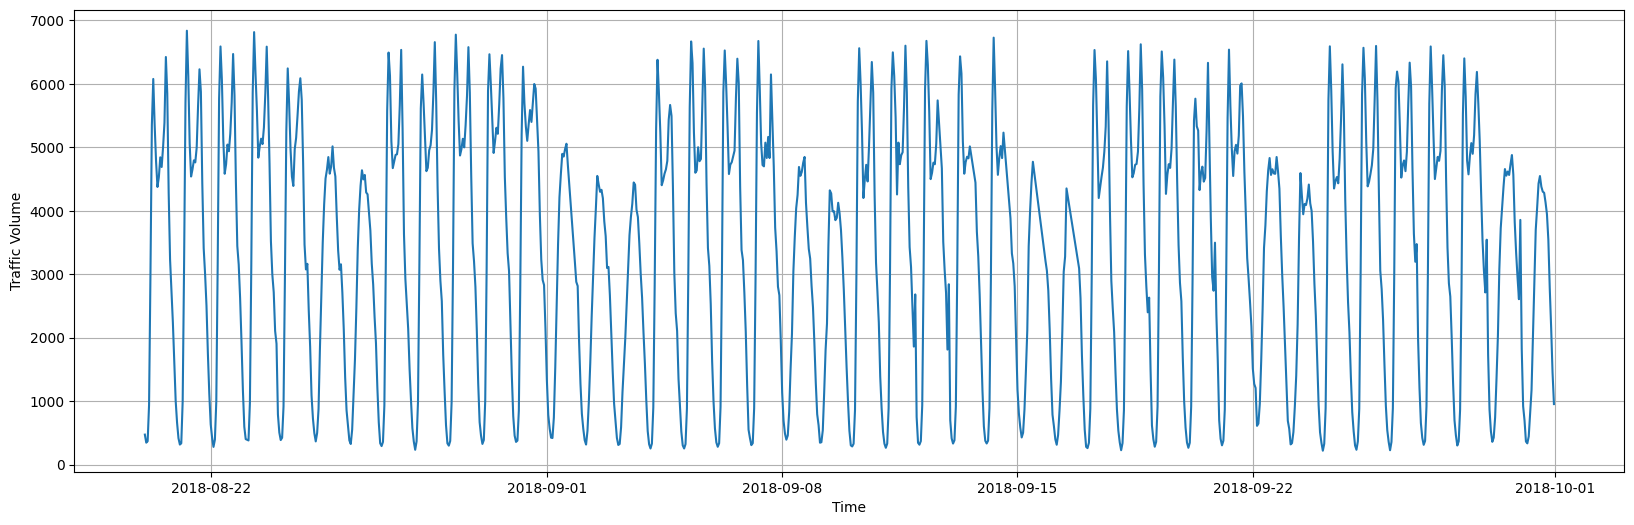

In [52]:
x_train = np.array(train_data['traffic_volume'])
x_valid = np.array(test_data['traffic_volume'])

time_train = np.array(train_data['ds'])
time_valid = np.array(test_data['ds'])

plt.figure(figsize=(20,6))
plot_series(time_valid, x_valid)

In [53]:
# Values of the attribute are in different scales. For example, holiday has maximum value 1 and traffic volume let say, 2000. Since these values are totally different range, it might be hurt model learning process. To overcome this issue, we need to do data normalization or standarization.
sc = MinMaxScaler()
sc_test = MinMaxScaler()
training_data_set = sc.fit_transform(train_data_without_ds)
training_data_frame = pd.DataFrame(training_data_set)
test_data_set = sc_test.fit_transform(test_data_without_ds)
test_data_frame = pd.DataFrame(test_data_set)


In [54]:
# Make data for the LSTM model. I used past t-hours of data to predict the next 'n' hours data. Here window_size means window size data will be used for predicting next 'n' hours data

def df_to_x_y(data, window_size=5):
    X = []
    y = []
    for i in range(len(data)-window_size):
        row = [r for r in data[i:i+window_size]]
        X.append(row)
        label = data[i+window_size][7]
        y.append(label)
    return np.array(X), np.array(y)

X, y = df_to_x_y(training_data_set,10)
X.shape, y.shape

((45949, 10, 8), (45949,))

In [61]:
# X test y Test
X_test, y_test = df_to_x_y(test_data_set, 10)
X_test.shape, y_test.shape

((1315, 10, 8), (1315,))

In [62]:
# split data into train test and validation datase
from cgi import test


train_length = int(len(X)*0.9) # 80% trainging
validation_length = int(len(X)*.10) # 10% testing and rest for validation
print(train_length, validation_length, (train_length+validation_length))
X_train, y_train = X[:train_length],y[:train_length]
X_val, y_val = X[train_length:], y[train_length:]

41354 4594 45948


In [63]:
(X_train.shape, y_train.shape), (X_val.shape, y_val.shape)


(((41354, 10, 8), (41354,)), ((4595, 10, 8), (4595,)))

In [64]:
#define model:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((10,8)))
model.add(LSTM(10, return_sequences=True))
model.add(LSTM(10, return_sequences=True))
model.add(LSTM(10))
model.add(Dense(10,'relu'))
model.add(Dense(1,'linear'))


In [65]:
cp = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001))


In [67]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, callbacks=[cp], batch_size=16, verbose=1)

Epoch 1/5
2585/2585 [==============================] - ETA: 0s - loss: 0.0603

2022-11-15 20:39:40.558267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-15 20:39:40.725814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-15 20:39:40.776588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-15 20:39:40.846546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2585/2585 [==============================] - 68s 26ms/step - loss: 0.0603 - val_loss: 0.0375
Epoch 2/5
2584/2585 [============================>.] - ETA: 0s - loss: 0.0341

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2585/2585 [==============================] - 68s 26ms/step - loss: 0.0341 - val_loss: 0.0254
Epoch 3/5
2585/2585 [==============================] - ETA: 0s - loss: 0.0244

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2585/2585 [==============================] - 68s 26ms/step - loss: 0.0244 - val_loss: 0.0159
Epoch 4/5
2584/2585 [============================>.] - ETA: 0s - loss: 0.0150

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2585/2585 [==============================] - 67s 26ms/step - loss: 0.0150 - val_loss: 0.0091
Epoch 5/5
2585/2585 [==============================] - ETA: 0s - loss: 0.0100

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2585/2585 [==============================] - 68s 26ms/step - loss: 0.0100 - val_loss: 0.0065


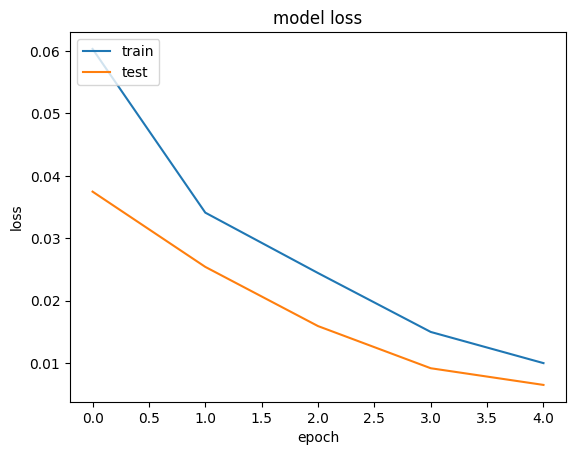

In [68]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
from tensorflow.keras.models import load_model
m = load_model('model/')

In [70]:
pre = m.predict(X_test)

2022-11-15 20:44:50.279729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-15 20:44:50.464171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 6/42 [===>..........................] - ETA: 0s 

2022-11-15 20:44:50.562918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-15 20:44:50.630619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


42/42 [==============================] - 1s 11ms/step


In [71]:
from tabnanny import verbose


eva = m.evaluate(X_test, y_test, verbose=0)

2022-11-15 20:44:56.172145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-15 20:44:56.334423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-15 20:44:56.394033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-15 20:44:56.454627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [72]:
eva

0.007552917581051588

In [73]:
Y = np.repeat(pre, 8, axis=1)
TT = sc.inverse_transform(Y)
TT 

array([[8.09251189e-01, 2.90512695e+02, 4.50186424e+01, ...,
        8.09251213e+00, 2.99422932e+01, 5.89134863e+03],
       [7.05408156e-01, 2.84465912e+02, 3.92418556e+01, ...,
        7.05408144e+00, 2.61001015e+01, 5.13537158e+03],
       [7.50403941e-01, 2.87086029e+02, 4.17449722e+01, ...,
        7.50403929e+00, 2.77649460e+01, 5.46294092e+03],
       ...,
       [3.38009477e-01, 2.63072296e+02, 1.88034668e+01, ...,
        3.38009477e+00, 1.25063505e+01, 2.46070898e+03],
       [1.96706086e-01, 2.54844193e+02, 1.09427595e+01, ...,
        1.96706080e+00, 7.27812529e+00, 1.43202026e+03],
       [1.43707186e-01, 2.51758087e+02, 7.99443054e+00, ...,
        1.43707180e+00, 5.31716585e+00, 1.04618835e+03]], dtype=float32)

In [74]:
Y_test = np.repeat(y_test, 8)
Y_test = Y_test.reshape(-1,8)
Y_TT = sc_test.inverse_transform(Y_test)
Y_TT

array([[7.75158658e-01, 2.95466092e+02, 8.21668178e+00, ...,
        7.75158658e+00, 2.73553944e+01, 5.34900000e+03],
       [7.75158658e-01, 2.95466092e+02, 8.21668178e+00, ...,
        7.75158658e+00, 2.73553944e+01, 5.34900000e+03],
       [6.88727712e-01, 2.93100477e+02, 7.30051375e+00, ...,
        6.88727712e+00, 2.44167422e+01, 4.77700000e+03],
       ...,
       [2.93139921e-01, 2.82273240e+02, 3.10728317e+00, ...,
        2.93139921e+00, 1.09667573e+01, 2.15900000e+03],
       [1.86007857e-01, 2.79341035e+02, 1.97168329e+00, ...,
        1.86007857e+00, 7.32426715e+00, 1.45000000e+03],
       [1.11060743e-01, 2.77289733e+02, 1.17724388e+00, ...,
        1.11060743e+00, 4.77606528e+00, 9.54000000e+02]])

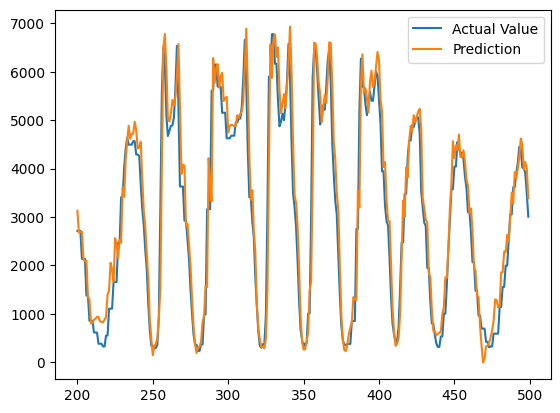

In [75]:
Y_pred = TT[:, 7]
Y_test = Y_TT[:, 7]

X =  [i for i in range(len(Y_TT))]
plt.plot(X[200:500], Y_test[200:500])
plt.plot(X[200:500], Y_pred[200:500])
plt.legend(['Actual Value','Prediction'])
plt.show()

In [85]:
def plot_series(time, series_true, series_pred, format='-', start=0, end=None):
    plt.plot(time[start:end], series_true[start:end],format)
    plt.plot(time[start:end], series_pred[start:end],format)
    plt.xlabel('Time')
    plt.ylabel('Traffic Volume')
    plt.grid(True)

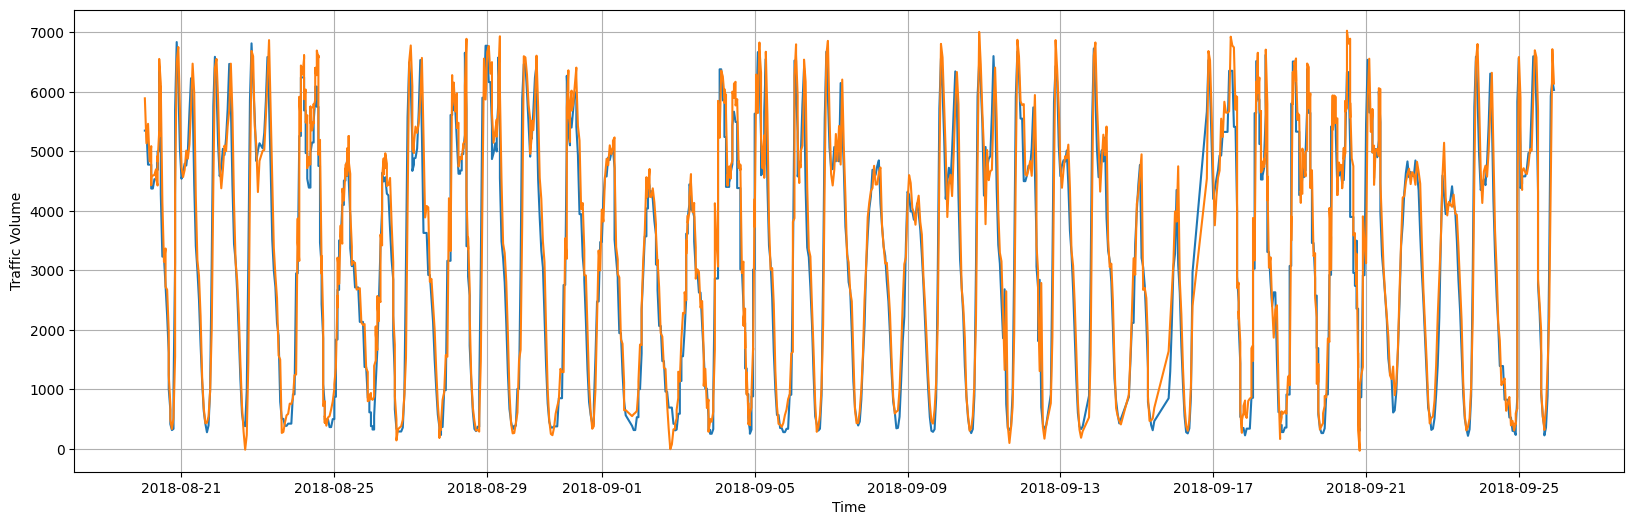

In [87]:
y_pred = np.array(Y_pred)
y_true = np.array(Y_test)

time_test = np.array(test_data['ds'])

plt.figure(figsize=(20,6))
plot_series(time_test[:1200], y_true[:1200],y_pred[:1200])

In [82]:
len(y_true), len(time_test[:-10]), len(y_pred)

(1315, 1315, 1315)

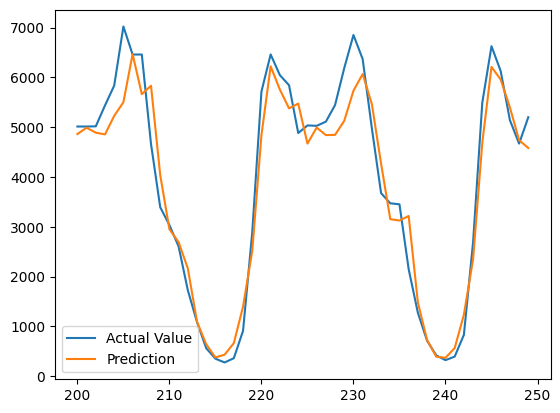

In [29]:
Y_pred = TT[:, 7]
Y_test = Y_TT[:, 7]

X =  [i for i in range(len(Y_TT))]
plt.plot(X[200:250], Y_test[200:250])
plt.plot(X[200:250], Y_pred[200:250])
plt.legend(['Actual Value','Prediction'])
plt.show()

In [ ]:
# UsefulLink: https://github.com/umaimakhh/nueral_network_deep_learning/blob/main/Metro_interstate_traffic_volume_RNN.ipynb